## ABHISHEK KUMAR
## 20BAI10384

## K Means Clustering

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN


Text(0, 0.5, 'Income($)')

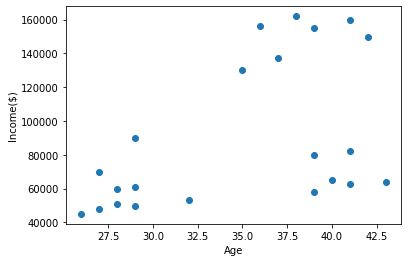

In [37]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [38]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3],
      dtype=int32)

In [39]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,27,70000,NaN,0
1,Michael,29,90000,NaN,0
2,Mohan,29,61000,NaN,3
3,Ismail,28,60000,NaN,3
4,Kory,42,150000,NaN,1


In [40]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.60000000e+01, 1.33500000e+05],
       [3.29090909e+01, 5.61363636e+04]])

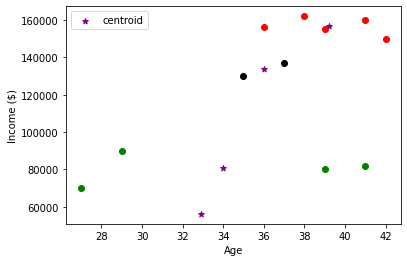

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

## Pre-processing using MinMax Scalar

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,2
1,Michael,0.176471,0.384615,NaN,2
2,Mohan,0.176471,0.136752,NaN,0
3,Ismail,0.117647,0.128205,NaN,0
4,Kory,0.941176,0.897436,NaN,1


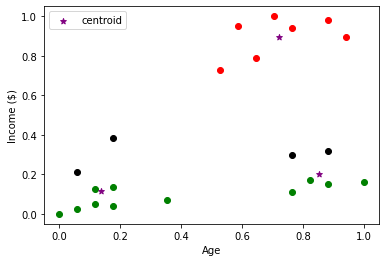

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

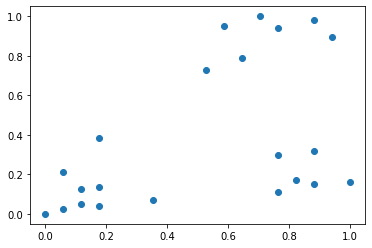

In [13]:
plt.scatter(df.Age,df['Income($)'])

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [24]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Unnamed: 3,cluster
0,Rob,0.058824,0.213675,NaN,1
1,Michael,0.176471,0.384615,NaN,1
2,Mohan,0.176471,0.136752,NaN,1
3,Ismail,0.117647,0.128205,NaN,1
4,Kory,0.941176,0.897436,NaN,0


In [25]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

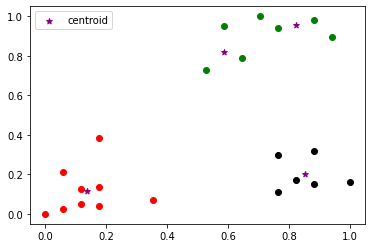

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(df4.Age,df4['Income($)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow Plot

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

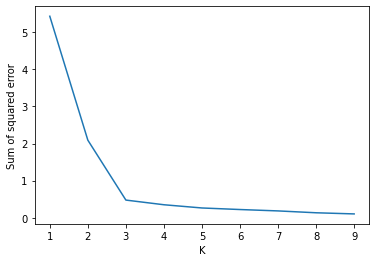

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)